In [36]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS

In [3]:
L = 3
H_xzx = sparse_cluster_hamiltonian(J=1,h_t=0,L=L)

In [4]:
e, v = diagonalization(H_xzx, sparse=False)
print(e)

[-1.00002 -1.      -1.      -0.99998  0.99998  1.       1.       1.00002]


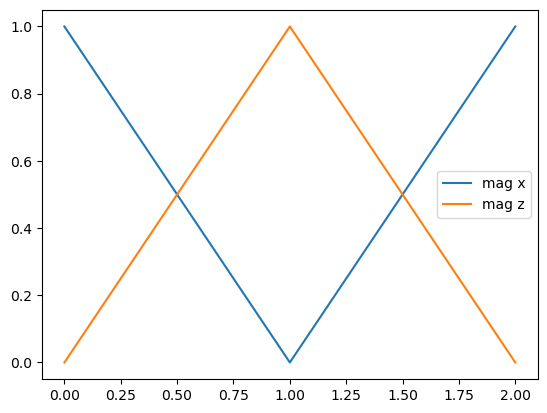

In [5]:
psi = v[:,0]
mag_x = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

## Add an external field

transverse field: -10.0
transverse field: -9.797979797979798
transverse field: -9.595959595959595
transverse field: -9.393939393939394
transverse field: -9.191919191919192
transverse field: -8.98989898989899
transverse field: -8.787878787878787
transverse field: -8.585858585858587
transverse field: -8.383838383838384
transverse field: -8.181818181818182
transverse field: -7.979797979797979
transverse field: -7.777777777777778
transverse field: -7.575757575757576
transverse field: -7.373737373737374
transverse field: -7.171717171717171
transverse field: -6.96969696969697
transverse field: -6.767676767676768
transverse field: -6.565656565656566
transverse field: -6.363636363636363
transverse field: -6.161616161616162
transverse field: -5.959595959595959
transverse field: -5.757575757575758
transverse field: -5.555555555555555
transverse field: -5.353535353535354
transverse field: -5.151515151515151
transverse field: -4.94949494949495
transverse field: -4.747474747474747
transverse field:

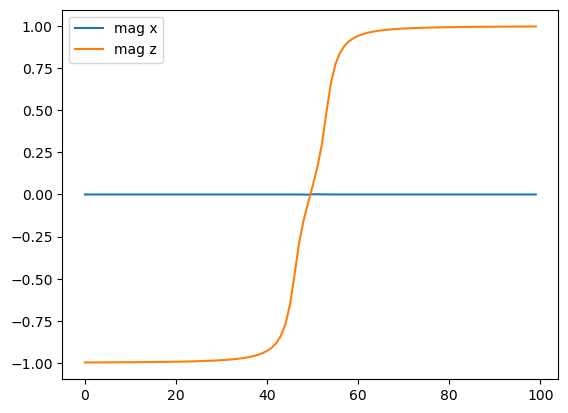

In [9]:
L = 12
mag_x = []
mag_z = []
for lamb in np.linspace(-10,10,100):
    print(f"transverse field: {lamb}")
    H = sparse_cluster_hamiltonian(J=1, h_t = lamb, L=L)
    e, v = diagonalization(H, sparse=True)
    psi = v[:,0]
    mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()


## Make it 2D

In [38]:
L = 15
mag_x = []
mag_z = []
rdms = []
grid_h = np.linspace(0, 2, 32).tolist()
grid_h.reverse()
grid_j = np.linspace(0, 2, 32)

v0 = np.zeros((2**L,1))
v0[0] = 1

for j in grid_j:
    mag_x_j = []
    mag_z_j = []
    rdm_j = []
    for h in grid_h:
        print(f"transverse field h: {h} for j: {j}")
        H = sparse_cluster_hamiltonian(J=j, h_t=h, L=L)
        e, v = diagonalization(H, sparse=True, v0=v0)
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_j.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_j.append(mag)
        if h == grid_h[0]:
            v0_j = psi
        v0 = psi

        chain = MPS(L=L, d=2, model="Cluster", chi=128)
        chain.vector_to_mps(vec=psi, chi=128)
        rdm = chain.reduced_density_matrix([L//2])
        rdm_j.append(rdm)

    v0 = v0_j
    mag_x_j.reverse()
    mag_z_j.reverse()
    rdm_j.reverse()
    mag_x.append(mag_x_j)
    mag_z.append(mag_z_j)
    rdms.append(rdm_j)

transverse field h: 2.0 for j: 0.0
transverse field h: 1.935483870967742 for j: 0.0
transverse field h: 1.8709677419354838 for j: 0.0
transverse field h: 1.8064516129032258 for j: 0.0
transverse field h: 1.7419354838709677 for j: 0.0
transverse field h: 1.6774193548387095 for j: 0.0
transverse field h: 1.6129032258064515 for j: 0.0
transverse field h: 1.5483870967741935 for j: 0.0
transverse field h: 1.4838709677419355 for j: 0.0
transverse field h: 1.4193548387096775 for j: 0.0
transverse field h: 1.3548387096774193 for j: 0.0
transverse field h: 1.2903225806451613 for j: 0.0
transverse field h: 1.2258064516129032 for j: 0.0
transverse field h: 1.161290322580645 for j: 0.0
transverse field h: 1.096774193548387 for j: 0.0
transverse field h: 1.032258064516129 for j: 0.0
transverse field h: 0.967741935483871 for j: 0.0
transverse field h: 0.9032258064516129 for j: 0.0
transverse field h: 0.8387096774193548 for j: 0.0
transverse field h: 0.7741935483870968 for j: 0.0
transverse field h: 

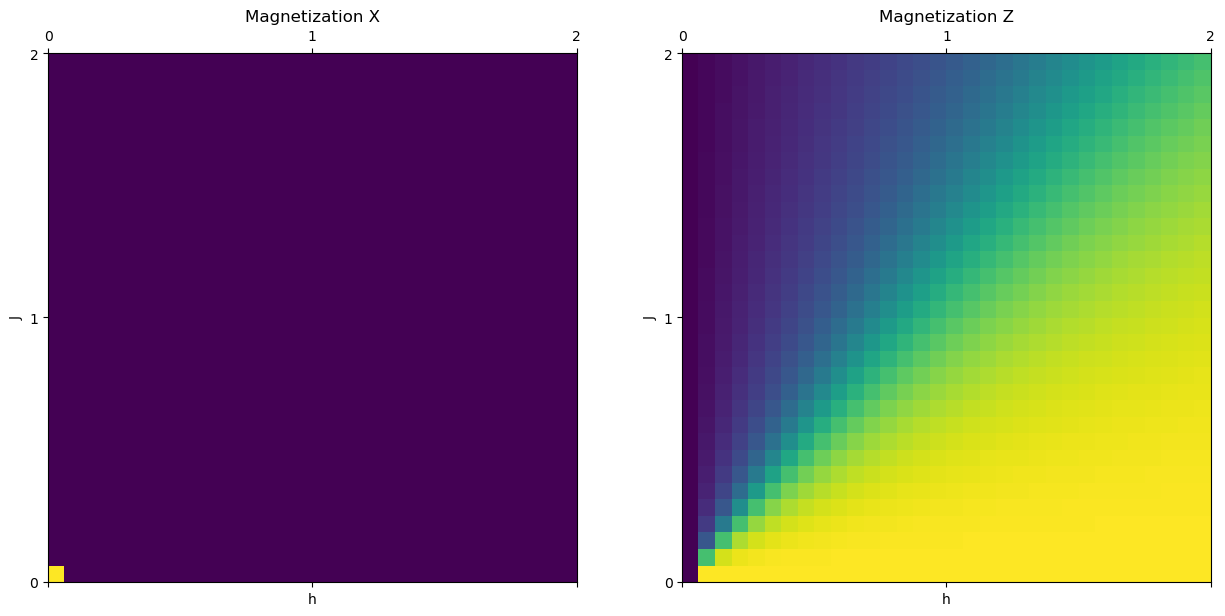

In [39]:
params = [[j,h] for j in grid_j for h in grid_j]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].matshow(mag_x, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("h")
ax[0].set_ylabel("J")
ax[1].matshow(mag_z, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization Z")
ax[1].set_xlabel("h")
ax[1].set_ylabel("J");

In [41]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_1-rdms_cluster_L_{L}_h-j_0.0-2.0_delta_32_degeneracy_method_2_guess_path.npy", rdms)

In [10]:
L = 9
s = 5
arr = [L//2]
for i in range(s-1):
    if i%2==0:
        arr+=[arr[0]-1]
        arr.sort()
    else:
        arr+=[arr[-1]+1]
        arr.sort()

arr.sort()
arr

[2, 3, 4, 5, 6]